In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset
ds = pd.read_csv('winequality-red.csv')

In [4]:
# Exploring the dataset further by knowing its features and shape
print('Features:', ds.columns)
print('Shape of the dataset:', ds.shape)

Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Shape of the dataset: (1599, 12)


In [5]:
# getting the number of rows and columns
print("Rows, columns: " + str(ds.shape))
# getting the first five rows of the dataset
ds.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#find missing values in dataset
print(ds.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
#QUALITY CHECK
round(100*(ds.isnull().sum()/len(ds)),2).sort_values(ascending=False)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [10]:
round(100*(ds.isnull().sum(axis=1)/len(ds)),2).sort_values(ascending=False)

0       0.0
1074    0.0
1072    0.0
1071    0.0
1070    0.0
       ... 
530     0.0
529     0.0
528     0.0
527     0.0
1598    0.0
Length: 1599, dtype: float64

In [11]:
#NO MISSING/NULL VALUE IN EITHER ROW OR COLUMNS
dub_ds=ds.copy()
dub_ds.drop_duplicates(subset=None,inplace=True)

In [12]:
dub_ds.shape

(1359, 12)

In [13]:
ds.shape

(1599, 12)

In [14]:
ds = dub_ds

In [15]:
for col in ds:
    print(ds[col].value_counts(ascending=False), '\n\n\n')

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64 



0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64 



0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: citric acid, Length: 80, dtype: int64 



2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64 



0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64 



6.0     121
5.0      88
15.0     65
12.0     64
10.0     63
7.0      61
9.0      55
16.0  

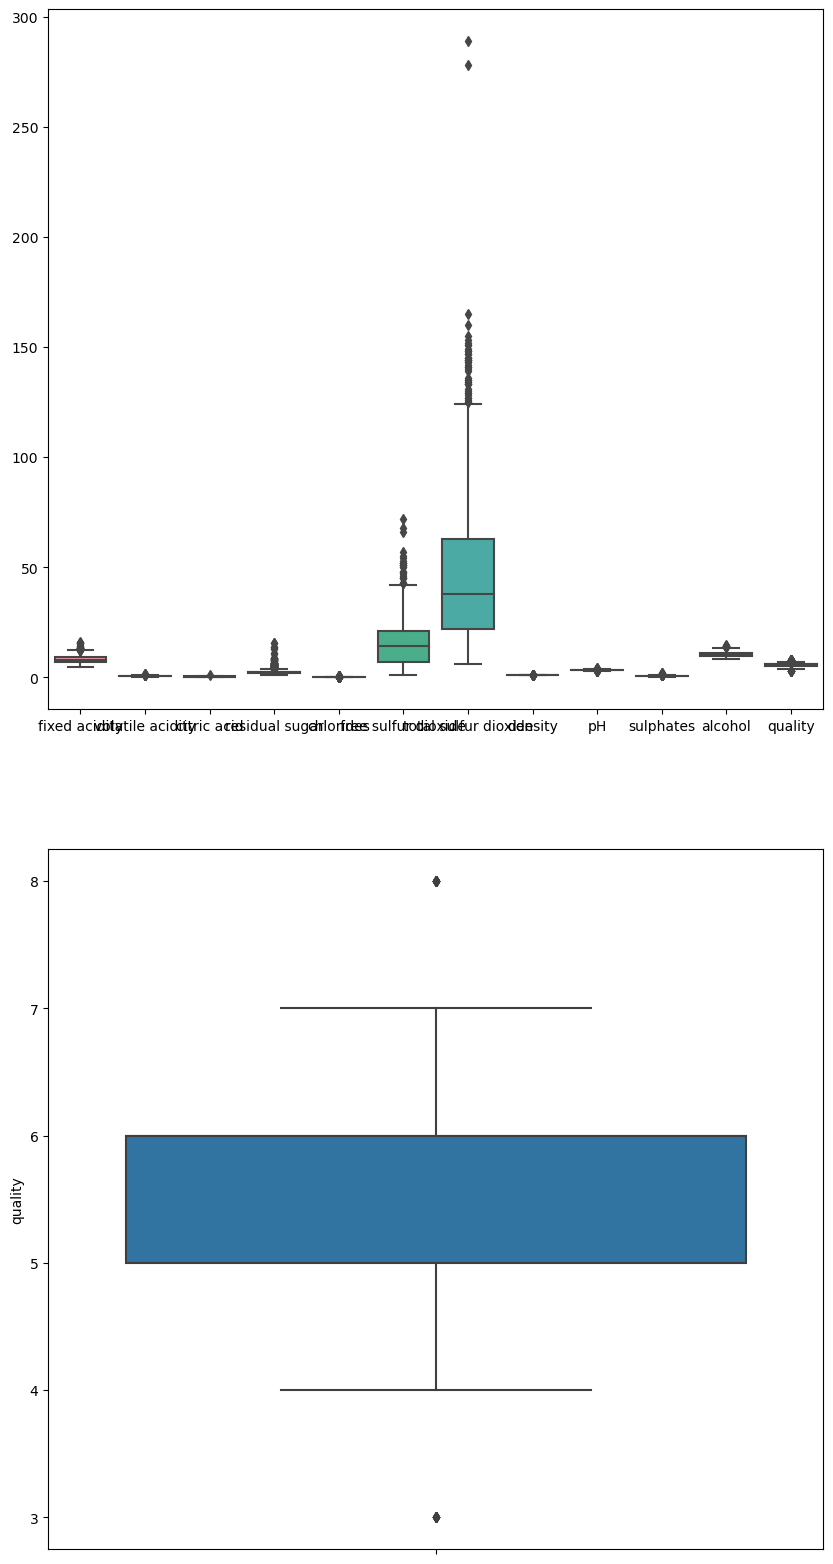

In [16]:
#Distribution of data
# Checking for outliers
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=ds,orient="v",ax=axes[0])
sns.boxplot(data=ds,y="quality",orient="pH",ax=axes[1])
plt.show()

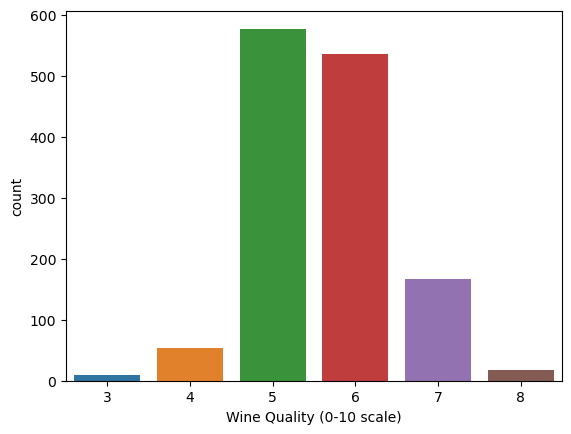

In [18]:
#distribution of class label
sns.countplot(x="quality", data=ds)
plt.xlabel("Wine Quality (0-10 scale)")
plt.show()

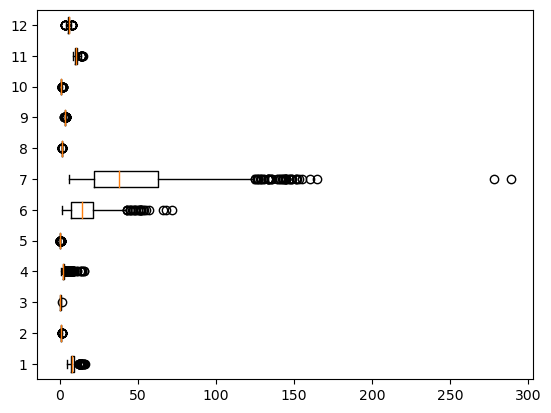

In [19]:
# Create the boxplot
fig, ax = plt.subplots()
box = ax.boxplot(ds.values, vert=False)

# Show the plot
plt.show()

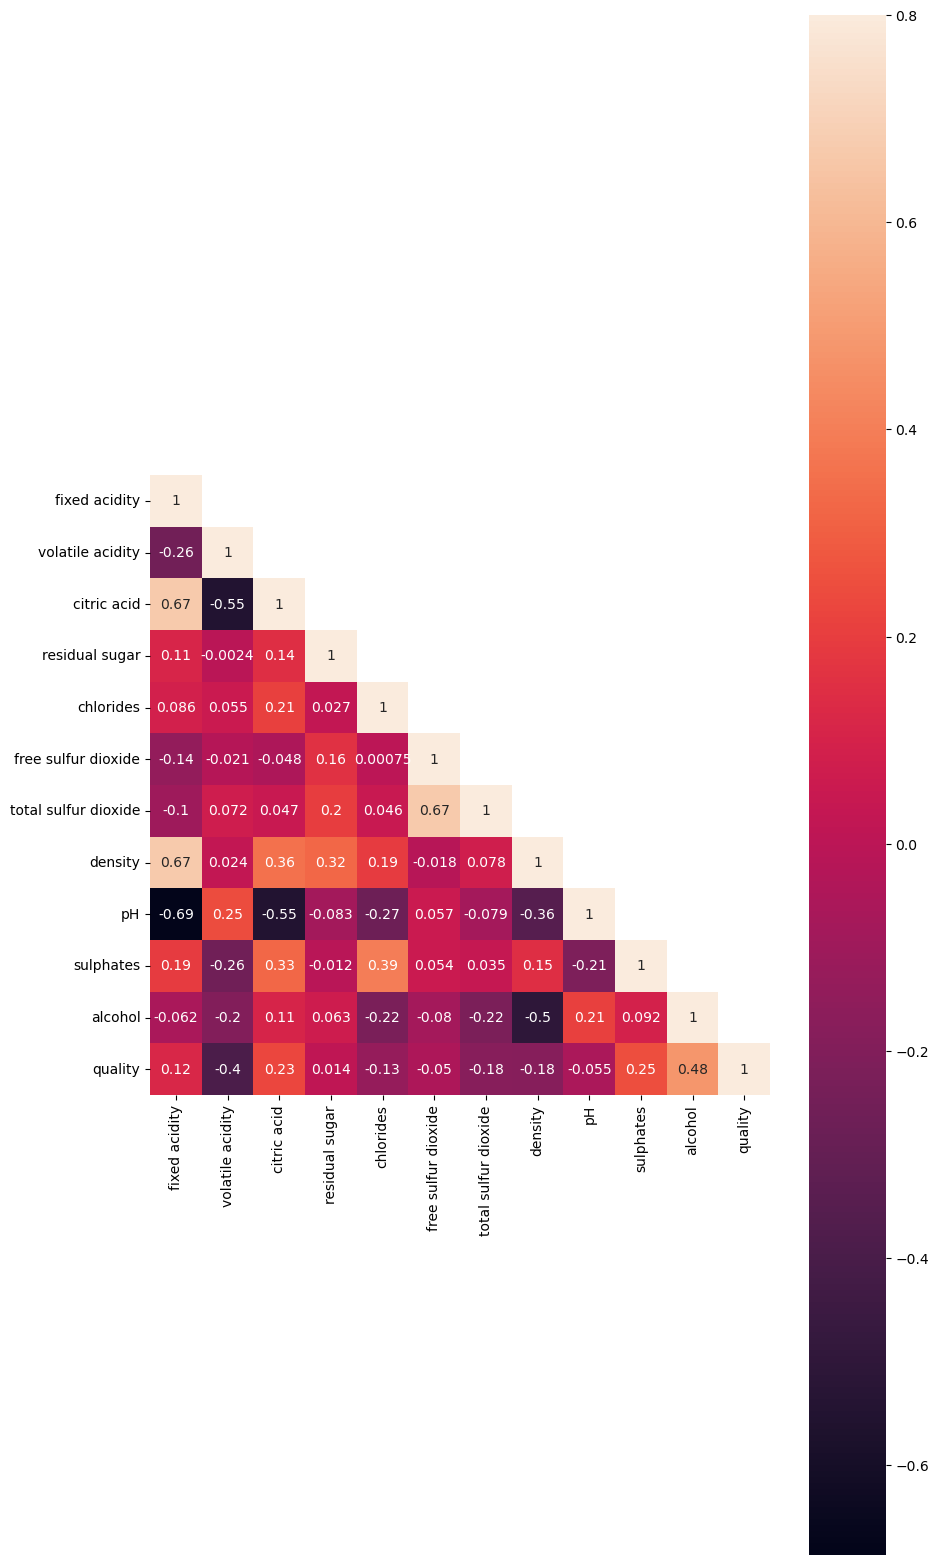

In [20]:
#Correlation analysis
corrMatt=ds.corr()
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

In [22]:
#Splitting class label from other features
X=ds.iloc[:, :-1].values
y=ds.iloc[:, -1].values

# adding extra column because of Multiple linear regression
X=np.append(arr=np.ones((X.shape[0],1)), values=X, axis=1)

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scaling the dataset
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

#Prediction
prediction=regressor.predict(X_test)

In [23]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,6.138235
1,5.172543
2,5.309591
3,6.044539
4,6.295814


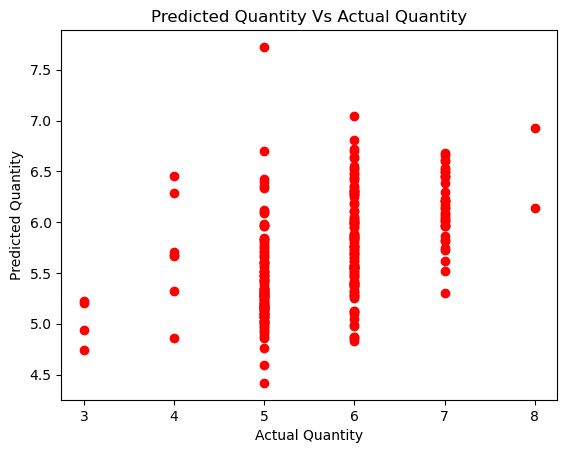

In [24]:
#displaying results
plt.scatter(y_test,prediction, c='r')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Predicted Quantity Vs Actual Quantity')
plt.show()